# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

# Simpson's rule

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

## Improving accuracy

The aim of numerical quadrature is to compute

$$\int_a^b f(x) \, \text{d}x$$

where $f$ is a real function of a single variable $x$.

Simple methods use polynomial quadrature: function values known at
*nodes* are interpolated by a (piecewise) polynomial $g$. The quadrature
is approximated by $\int g(x) \, \text{d}x$.

Introduced (composite) *trapezoidal* rule, where $g$ is a (piecewise)
linear polynomial – a straight line connecting neighbouring nodes.

Can improve accuracy by increasing the order of $g$. Simplest
improvement uses a quadratic polynomial, giving *Simpson’s* rule.

## Simpson’s rule

Three points are needed to determine a unique polynomial of order two.
Our discussion of Simpson’s rule will always assume equally spaced
points, so on the interval $[a, b]$ we use $\{a,
      (a+b)/2, b\}$ with $h = (b-a)/2$.

Work in coordinates about the centre of the interval, $\hat{x} =
      x - (a+b)/2$. Hence $\hat{x} \in [-h, h]$.

### Interpolating polynomial

In the coordinates $\hat{x} = x - (a+b)/2$ we have

$$\begin{aligned}
    && g(\hat{x}) & = \alpha \hat{x}^2 + \beta \hat{x} + \gamma, &
    \hat{x} \in [-h, h] \\
    \Rightarrow && A & = \int_{-h}^h g(\hat{x}) \, \text{d}x \\
    &&& = \tfrac{\alpha}{3} \left( 2 h^3 \right) + \gamma \left( 2 h
    \right).
  \end{aligned}$$

Simple to evaluate the coefficients as

$$\begin{aligned}
    g(\hat{x} = 0) & = \gamma, \\
    g(\hat{x} = -h) + g(\hat{x} = h) & = 2 \alpha h^2 + 2 \gamma.
  \end{aligned}$$

Putting this together we have

$$\begin{aligned}
    A & = \tfrac{h}{3} \left( \left( 2 \alpha h^2 + 2 \gamma \right) +
      4 \gamma \right) \\
    & = \frac{b - a}{6} \left[ f(a) + 4 f \left( \frac{a + b}{2}
      \right) + f(b) \right].
  \end{aligned}$$

### Composite Simpson’s Rule

As with trapezoidal rule, basic Simpson’s rule is very
inaccurate.


Instead use the *composite* Simpson’s rule. Interval is divided into
$N / 2$ equal subintervals length $2 h$,

$$h = (b - a) / N,$$

and Simpson’s rule is applied to each subinterval.


The factor of 2 implies 3 nodes in each subinterval: the boundary points
and a centre point. Each subinterval has a unique interpolating
quadratic, and no quadratic overlaps, giving a simple piecewise
polynomial.

### Composite Simpson’s rule formula

With the evenly spaced grid we obtain the formula

$$\int_a^b f(x) \, \text{d}x \simeq \frac{h}{3} \left[ f(a) + f(b) +
      2 \sum_{j=1}^{N/2 - 1} f_{2 j} + 4 \sum_{j=1}^{N/2} f_{2 j - 1}
    \right].$$

The error from Simpson’s rule is

$$\text{Error} \leq \frac{M_4}{180} ( b - a ) h^4, \quad M_4 = \max
    | f^{(4)} (x) |.$$

## Error analysis

We find the error by bounding the error for a single interval. Write
Simpson’s rule as a power law expansion in terms of the width of the
interval $2 h$ with centre $x_j$, and compare to the exact solution
expansion.

For one interval of Simpson’s rule:

$$A_j = \frac{h}{3} \left[ f_{j-1} + 4 f_j + f_{j+1} \right].$$

Taylor expand about the centre point of the interval $x_j$:

$$A_j = 2 h f_j + \frac{h^3}{3} f^{(2)}_j + \frac{h^5}{36} f^{(4)}_j
    + {\cal O}(h^6).$$

As before we need the exact result in powers of $h$. Working about the
centre of the interval we define

$$F(t) = \int_{x_j - t}^{x_j + t} f(x) \, \text{d}x$$

so that

$$F(h) = \int_{x_{j-1}}^{x_{j+1}} f(x) \, \text{d}x.$$

We note that

$$\frac{\text{d}^n F}{\text{d}t^n} = f^{(n-1)}(x_j + t) + (-1)^{n-1}
    f^{(n-1)}(x_j - t)$$

or in particular

$$\frac{\text{d} F}{\text{d}t} = f(x_j + t) + f(x_j - t).$$

From this we can Taylor expand about $t=0$ to find

$$F(h) = F(0) + h \left. \frac{\text{d}F}{\text{d}t} \right|_{t=0}
    + \dots$$

From the definition of $\text{d}F / \text{d}t$ we have

$$F(h) = 2 h f_j + \tfrac{h^3}{3} f^{(2)}_j + \tfrac{h^5}{60}
    f^{(4)}_j + \dots.$$

Comparing with Simpson’s rule

$$F(h) \simeq A_j = 2 h f_j + \tfrac{h^3}{3} f^{(2)}_j +
    \tfrac{h^5}{36} f^{(4)}_j + \dots$$

the error in the subinterval is

$$| A_j - F(h) | \leq \tfrac{h^5}{90} | f^{(4)}_j |.$$

Summing over all $N / 2$ subintervals and using $h N = (b - a)$ gives

$$\text{Error} \leq \frac{(b - a) h^4}{180} M_4, \quad M_4 =
    \max_{x\in[a,b]} | f^{(4)}(x) |.$$

## Example

We look at

$$\int_0^{\pi / 2} \sin(x) \, \text{d}x$$

using Simpson’s rule. The exact answer is 1.


With three points $x_j = \{0, \pi / 4, \pi / 2\}$ we have $h =
       \pi / 4$ and

| $j$   |  $x_j$      |   $f_j$          |
|:-----:|:-----------:|:----------------:|
|  $0$  |    $0$      |     $0$          |
|  $1$  |  $\pi / 4$  | $1 / \sqrt{2}$   |
|  $2$  |  $\pi / 2$  |     $1$          |

So

$$\begin{aligned}
         \int_0^{\pi / 2} \sin(x) \, \text{d}x & \simeq \frac{\pi / 4}{3}
         \left( 0 + 1 \right) + \frac{4 (\pi / 4)}{3} \left(
           \tfrac{1}{\sqrt{2}} \right)
         \\
         & = \tfrac{\pi}{12} \left( 1 + 2 \sqrt{2} \right) \\
         & \simeq 1.002.
       \end{aligned}$$


With five points $x_j = \{0, \pi / 8, \pi / 4, 3 \pi / 8, \pi /
      2\}$ we have $h = \pi / 8$ and

|   $j$ |     $x_j$     |     $f_j$        |
|:-----:|:-------------:|:----------------:|
|  $0$  |     $0$       |     $0$          |
|  $1$  |   $\pi / 8$   |   $0.38268$      |
|  $2$  |   $\pi / 4$   | $1 / \sqrt{2}$   |
|  $3$  |  $3 \pi / 8$  |   $0.92388$      |
|  $4$  |   $\pi / 2$   |     $1$          |

$$\begin{aligned}
        \int_0^{\pi / 2} \sin(x) \, \text{d}x  \simeq \frac{\pi / 8}{3}
        \left( 0 + 1 \right) &+ \frac{4 ( \pi / 8)}{3} \left( 0.38268
          + 0.92388 \right) \\ &+ \frac{2 ( \pi / 8)}{3} \left(
          1 / \sqrt{2} \right) \quad \simeq 1.000135.
      \end{aligned}$$


The example converges as expected with resolution.

In [3]:
def simpsons_quadrature(fn, a, b, N):
    """Integrate the function fn of one variable x over the interval [a, b] using the Simpson's rule with N+1 nodes."""
    import numpy as np
    
    assert(N%2 == 0)
    
    nodes = np.linspace(a, b, N+1)
    values = fn(nodes)
    
    h = (b - a) / float(N)
    
    return  h / 3.0 * (values[0] + values[-1] + 2.0 * np.sum(values[2:-1:2]) + 4.0 * np.sum(values[1:-1:2]))

def fn_sin(x):
    """Function used in quadrature example - fn = sin(x)."""
    import numpy as np
    
    return np.sin(x)

# Check the examples above
print("The quadrature of sin(x) between 0, pi/2, using N=2 is {}.".format(simpsons_quadrature(fn_sin, 0.0, np.pi / 2.0, 2)))
print("The quadrature of sin(x) between 0, pi/2, using N=4 is {}.".format(simpsons_quadrature(fn_sin, 0.0, np.pi / 2.0, 4)))

The quadrature of sin(x) between 0, pi/2, using N=2 is 1.0022798774922104.
The quadrature of sin(x) between 0, pi/2, using N=4 is 1.0001345849741938.


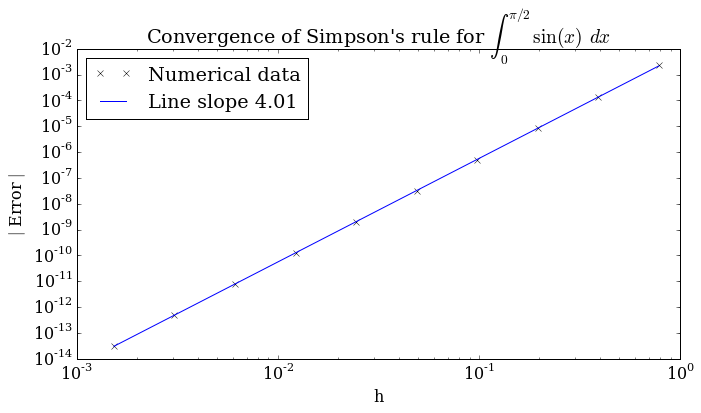

In [4]:
# Now show the behaviour with resolution

Npoints = np.array([2**i for i in range(1, 11)])
h = np.pi / 2.0 / Npoints
err = np.zeros_like(h)
for i in range(len(Npoints)):
    N = Npoints[i]
    quad = simpsons_quadrature(fn_sin, 0.0, np.pi / 2.0, N)
    err[i] = np.abs(1.0 - quad)

# Find the best fit to the data: if err ~ A h^s then the best fit straight line of log(err) vs log(h) has slope s.
p = np.polyfit(np.log(h), np.log(err), 1)
    
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.loglog(h, err, 'kx', label = 'Numerical data')
ax.loglog(h, np.exp(p[1])*h**(p[0]), 'b-', label = "Line slope {:.2f}".format(p[0]))
ax.set_xlabel('h')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title("Convergence of Simpson's rule for $\int_0^{\pi/2} \sin(x) \, dx$")
ax.legend(loc = 2)
fig.tight_layout()
plt.show()

## Yet higher order

Why not use cubics, quartics, …?

One way of deriving *spectral* methods, which converge faster than any
polynomial.

*However*, care is required. With equally spaced nodes may see problems,
e.g. the *Runge example*

$$f(x) = \frac{1}{1 + 25 x^2}.$$

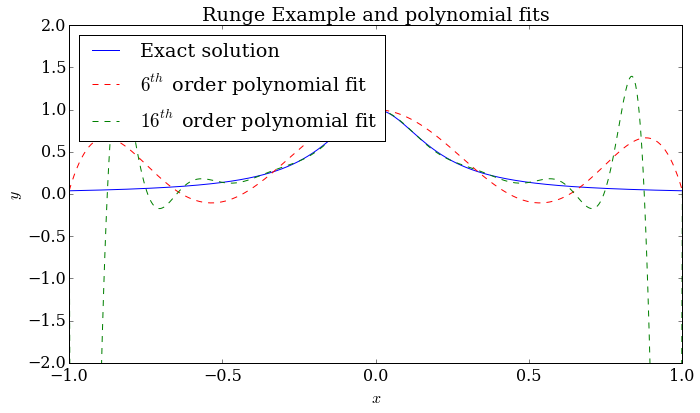

In [5]:
def runge(x):
    """The function in the Runge example"""
    return 1.0 / (1.0 + 25.0 * x**2)

x_exact = np.linspace(-1.0, 1.0, 500)
y_exact = runge(x_exact)

xi_6 = np.linspace(-1.0, 1.0, 7)
xi_16 = np.linspace(-1.0, 1.0, 17)

yi_6 = runge(xi_6)
p_6 = np.polyfit(xi_6, yi_6, 6)
y_6 = np.polyval(p_6, x_exact)

yi_16 = runge(xi_16)
p_16 = np.polyfit(xi_16, yi_16, 16)
y_16 = np.polyval(p_16, x_exact)


fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x_exact, y_exact, 'b-', label = 'Exact solution')
ax.plot(x_exact, y_6    , 'r--', label = '$6^{th}$ order polynomial fit')
ax.plot(x_exact, y_16   , 'g--', label = '$16^{th}$ order polynomial fit')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim([-2.0, 2.0])
ax.set_title("Runge Example and polynomial fits")
ax.legend(loc = 2)
fig.tight_layout()
plt.show()

# Richardson Extrapolation

A general trick for *any* numerical method with “enough” information
about the error. Illustrate with Simpson’s rule.

Assume the exact solution is $I$ and Simpson’s rule gives $I_h$ for
subintervals width $h$. We know

$$I - I_h \simeq C h^4.$$

*Assume* equality and that $C$ is independent of $h$. Hence

$$\begin{aligned}
    && I - I_h &= C h^4 &&&&\\
    && I - I_{2 h} &= C (2 h)^4 &&&&\\
    \Rightarrow && I  &= \frac{2^4 I_h - I_{2 h}}{2^4 - 1}.&&&&
  \end{aligned}$$

## Example

In [6]:
I_2h = simpsons_quadrature(fn_sin, 0.0, np.pi / 2.0, 2)
I_h  = simpsons_quadrature(fn_sin, 0.0, np.pi / 2.0, 4)
I_Richardson = (2.0**4 * I_h - I_2h) / (2.0**4 - 1.0)
print("Richardson extrapolation of the previous integral example produces the result {}.".format(I_Richardson))
print("Errors:\nN = 2: {}.\nN = 4: {}.\nRichardson: {}.".format(I_2h - 1.0, I_h - 1.0, I_Richardson - 1.0))

Richardson extrapolation of the previous integral example produces the result 0.9999915654729927.
Errors:
N = 2: 0.0022798774922103693.
N = 4: 0.00013458497419382986.
Richardson: -8.434527007272763e-06.


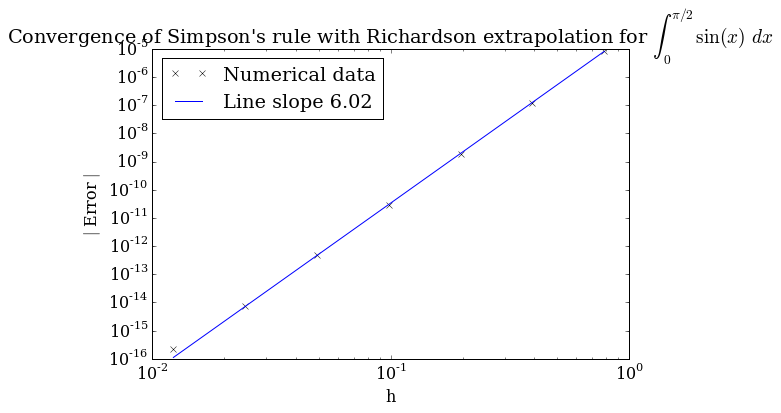

In [7]:
# Now show the behaviour with resolution

Npoints = np.array([2**i for i in range(1, 8)])
h = np.pi / 2.0 / Npoints
err = np.zeros_like(h)
for i in range(len(Npoints)):
    N = Npoints[i]
    quad_2h = simpsons_quadrature(fn_sin, 0.0, np.pi / 2.0, N)
    quad_h = simpsons_quadrature(fn_sin, 0.0, np.pi / 2.0, 2*N)
    quad_Richardson = (2.0**4 * quad_h - quad_2h) / (2.0**4 - 1.0)
    err[i] = np.abs(1.0 - quad_Richardson)

# Find the best fit to the data: if err ~ A h^s then the best fit straight line of log(err) vs log(h) has slope s.
p = np.polyfit(np.log(h[:-1]), np.log(err[:-1]), 1)
    
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.loglog(h, err, 'kx', label = 'Numerical data')
ax.loglog(h, np.exp(p[1])*h**(p[0]), 'b-', label = "Line slope {:.2f}".format(p[0]))
ax.set_xlabel('h')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title("Convergence of Simpson's rule with Richardson extrapolation for $\int_0^{\pi/2} \sin(x) \, dx$")
ax.legend(loc = 2)
fig.tight_layout()
plt.show()


Richardson Extrapolation does not magically give the *exact* answer. It
removes the leading order error term. For Simpson’s rule this leads to
convergence $\propto
      h^6$.

If

-   function under-resolved, or
-   error behaves badly (e.g. $f$ has limited differentiability)

Richardson extrapolation may fail. For this reason it is generically
used to estimate error, not to improve accuracy.